# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merge_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice = merge_df["Mouse ID"].nunique()
print(number_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merge_df.loc[merge_df.duplicated(subset = ["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicated_mice 

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_df = merge_df[(merge_df["Mouse ID"] == "g989")]
duplicated_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Use boolean indexing
#"!=" means "Mouse ID" column is not equal to "g989"
#".copy" is used to create a new DataFrame 
mouse_df = merge_df[merge_df["Mouse ID"]!= "g989"].copy()
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mouse = mouse_df["Mouse ID"].nunique()
print(number_mouse)

248


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_mice= mouse_df.groupby("Drug Regimen")
mean = grouped_mice["Tumor Volume (mm3)"].mean()
median = grouped_mice["Tumor Volume (mm3)"].mean()
variance = grouped_mice["Tumor Volume (mm3)"].var()
std_dv = grouped_mice["Tumor Volume (mm3)"].std()
sem = grouped_mice["Tumor Volume (mm3)"].sem()

mice_summary = pd.DataFrame({"Drug Regimen":grouped_mice["Drug Regimen"].first(),
                                             "Mean Tumor Volume": mean, "Median Tumor Volume": median,
                                             "Tumor Volume Variance": variance, "Tumor Volume Std.Dev": std_dv,
                                             "Tumor Volume Std. Err.":sem})
mice_summary

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,,
Capomulin,Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,Propriva,52.320930,52.320930,43.852013,6.622085,0.544332
Ramicane,Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_mouse= mouse_df.groupby("Drug Regimen")
mouse_summary = grouped_mouse["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std","sem"])
mouse_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

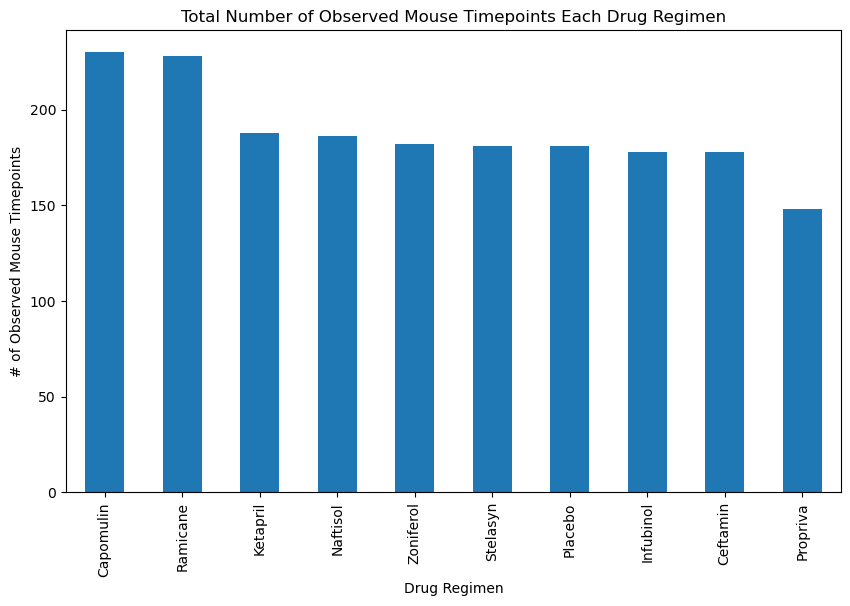

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_pandas = mouse_df["Drug Regimen"].value_counts()
bar_pandas.plot(kind="bar", figsize=(10,6))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Observed Mouse Timepoints Each Drug Regimen')
plt.show()

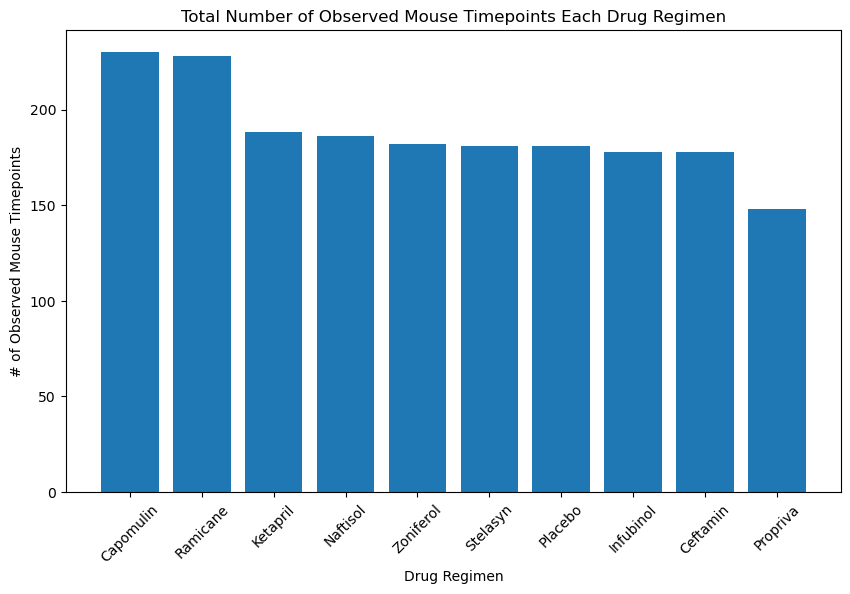

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_pyplot = mouse_df["Drug Regimen"].value_counts()
x = bar_pyplot.index
y = bar_pyplot.values
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Observed Mouse Timepoints Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()

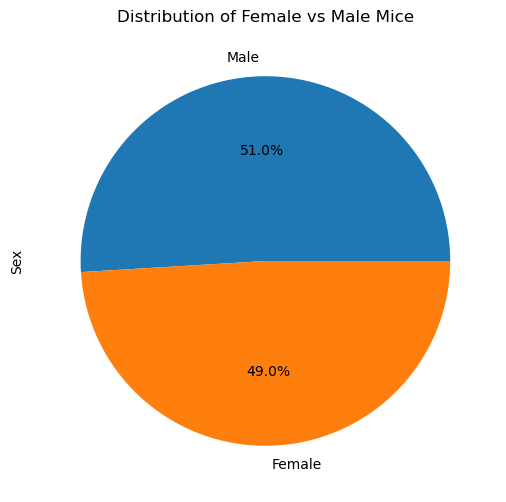

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pandas = mouse_df['Sex'].value_counts()
gender_pandas.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Distribution of Female vs Male Mice')
plt.show()

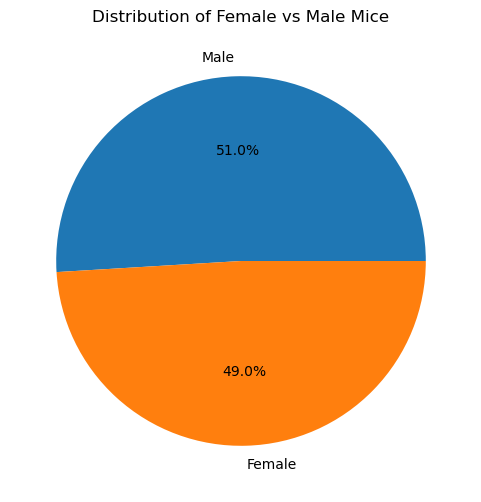

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot = mouse_df['Sex'].value_counts()
labels = gender_pyplot.index
sizes = gender_pyplot.values
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



In [34]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_timeplot = mouse_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
greatest_timeplot

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [37]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(mouse_df,greatest_timeplot, how="left", on=["Mouse ID", "Timepoint"])
tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
     
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = tumor_volume.loc[tumor_volume["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(treatment_data)
    
    # add subset 
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    print(f"IQR for {treatment}: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}\n")

IQR for Capomulin: 7.314067135000002
Potential outliers for Capomulin: 1639    25.472143
1836    23.343598
Name: Tumor Volume (mm3), dtype: float64

IQR for Ramicane: 8.325365415
Potential outliers for Ramicane: 1801    22.050126
Name: Tumor Volume (mm3), dtype: float64

IQR for Infubinol: 10.002090667500006
Potential outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)

IQR for Ceftamin: 9.593010457500007
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)



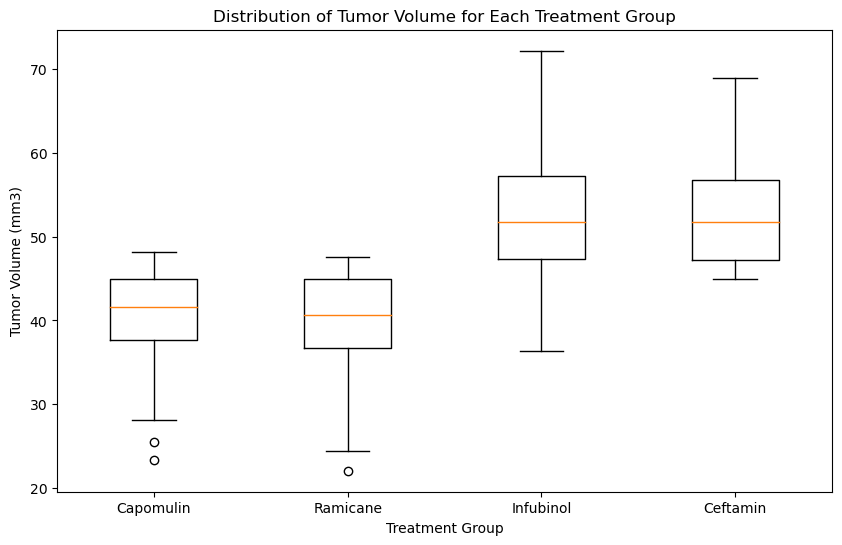

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatment_list)
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.show()

## Line and Scatter Plots

In [44]:
tumor_volume.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

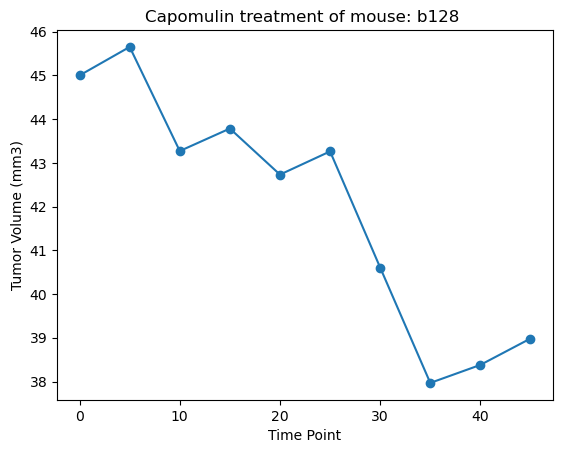

In [50]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'b128'  # Replace 'your_mouse_id' with the actual mouse ID
capomulin_data = tumor_volume.loc[(tumor_volume['Drug Regimen'] == 'Capomulin') & (tumor_volume['Mouse ID'] == mouse_id)]
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o')
# Set plot labels and title
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse: {mouse_id} ')

# Display the plot
plt.show()

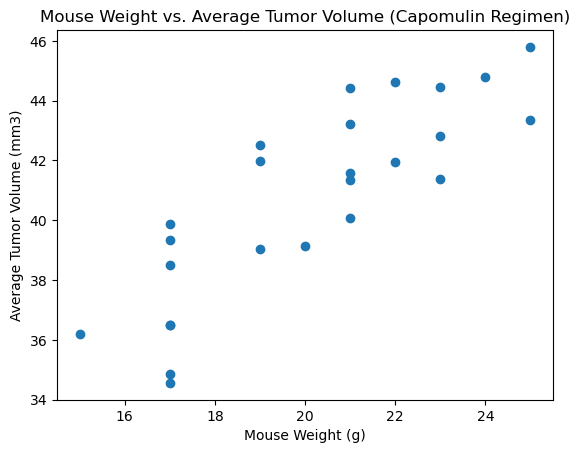

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = tumor_volume[tumor_volume['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
plt.scatter(mouse_weight, avg_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.show()

## Correlation and Regression

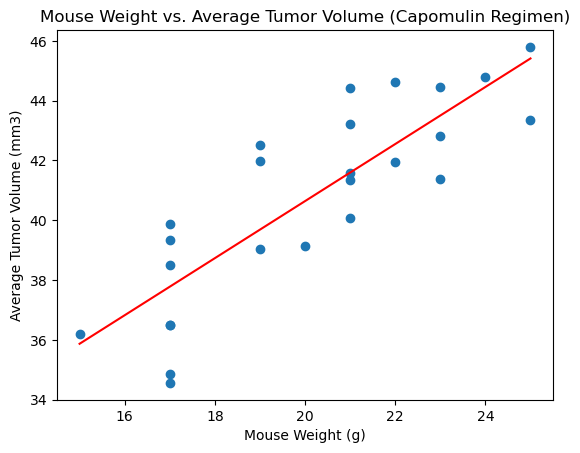

Correlation Coefficient: 0.8419363424694722
Linear Regression Model: y = 0.95 * x + 21.55


In [52]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Filter the DataFrame to include only the Capomulin regimen
capomulin_data = tumor_volume[tumor_volume['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Calculate the correlation coefficient
correlation_coef = np.corrcoef(mouse_weight, avg_tumor_volume)[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

# Generate the scatter plot
plt.scatter(mouse_weight, avg_tumor_volume)

# Generate the line of best fit
x_values = np.linspace(min(mouse_weight), max(mouse_weight), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')

# Set plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Display the plot
plt.show()

# Print the correlation coefficient and linear regression model information
print(f"Correlation Coefficient: {correlation_coef}")
print(f"Linear Regression Model: y = {slope:.2f} * x + {intercept:.2f}")
